In [1]:
import os
import sys

sys.path.append('/root/diffuser_chain_hd')
# print(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# exit()


import json
import numpy as np
from os.path import join
import pdb

from diffuser.guides.policies import Policy
import diffuser.datasets as datasets
import diffuser.utils as utils

import argparse


class Parser(utils.Parser):
    dataset: str = 'maze2d-xxlarge-v1'
    config: str = 'config.maze2d_390_actionWeight1'


#---------------------------------- setup ----------------------------------#
n_samples = 100

args = Parser().parse_args('diffusion', add_extras=False) # Discovered it later, so had to disable it as I am doing it here, until I test it


No module named 'flow'
/usr/local/lib/python3.8/dist-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'carla'
pybullet build time: Nov 28 2023 23:51:11


RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xd . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

numpy.core.multiarray failed to import
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[ utils/setup ] Reading config: config.maze2d_390_actionWeight1:maze2d_xxlarge_v1
[ utils/setup ] Using overrides | config: config.maze2d_390_actionWeight1 | dataset: maze2d_xxlarge_v1
[ utils/setup ] Setting exp_name to: diffuserdiffuserdiffusion_actW1/H780_T256_J1
[ utils/setup ] Made savepath: logs/maze2d-xxlarge-v1/diffuserdiffuserdiffusion_actW1/H780_T256_J1
[ utils/setup ] Saved args to logs/maze2d-xxlarge-v1/diffuserdiffuserdiffusion_actW1/H780_T256_J1/args.json


In [2]:
env = datasets.load_environment(args.dataset)

args.dataset

'maze2d-xxlarge-v1'

In [36]:
dataset_config = utils.Config(
    args.loader,
    savepath=(args.savepath, "dataset_config.pkl"),
    env=args.dataset,
    horizon=args.horizon,#1000,
    normalizer=args.normalizer,
    preprocess_fns=args.preprocess_fns,
    use_padding=args.use_padding,
    max_path_length=args.max_path_length,
    jump=args.jump,
    jump_action=args.jump_action,
)


render_config = utils.Config(
    args.renderer,
    savepath=(args.savepath, "render_config.pkl"),
    env=args.dataset,
)

[ utils/config ] Imported diffuser.datasets:GoalDataset

[utils/config ] Config: <class 'diffuser.datasets.sequence.GoalDataset'>
    env: maze2d-xxlarge-v1
    horizon: 780
    jump: 1
    jump_action: none
    max_path_length: 300000
    normalizer: LimitsNormalizer
    preprocess_fns: ['maze2d_set_terminals']
    use_padding: False

[ utils/config ] Saved config to: logs/maze2d-xxlarge-v1/diffuserdiffuserdiffusion_actW1/H780_T256_J1/dataset_config.pkl

[ utils/config ] Imported diffuser.utils:Maze2dRenderer

[utils/config ] Config: <class 'diffuser.utils.rendering.Maze2dRenderer'>
    env: maze2d-xxlarge-v1

[ utils/config ] Saved config to: logs/maze2d-xxlarge-v1/diffuserdiffuserdiffusion_actW1/H780_T256_J1/render_config.pkl



In [37]:
args.horizon

780

In [38]:
dataset = dataset_config()
renderer = render_config()



load datafile: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 20.47it/s]


[ utils/preprocessing ] Segmented maze2d-xxlarge-v1 | 27 paths | min length: 1389 | max length: 129159 | mean length: 35778.11111111111
[ datasets/buffer ] Finalized replay buffer | 28 episodes
[ datasets/buffer ] Fields:
    actions: (28, 300000, 2)
    infos/goal: (28, 300000, 2)
    infos/qpos: (28, 300000, 2)
    infos/qvel: (28, 300000, 2)
    observations: (28, 300000, 4)
    rewards: (28, 300000, 1)
    terminals: (28, 300000, 1)
    timeouts: (28, 300000, 1)
    next_observations: (28, 300000, 4)
    normed_observations: (28, 300000, 4)
    normed_actions: (28, 300000, 2)


[ 21383  60473   7483 129158  86779  19638  86216  75601   3729   9494
  36399  52781   7733  12984  23499  12704  70990  17153  18735  93734
  22067   9626  62381   9863  13013  19649   2712   1388]


(array([11.,  7.,  1.,  0.,  3.,  2.,  2.,  1.,  0.,  1.]),
 array([  1388.,  14165.,  26942.,  39719.,  52496.,  65273.,  78050.,
         90827., 103604., 116381., 129158.]),
 <BarContainer object of 10 artists>)

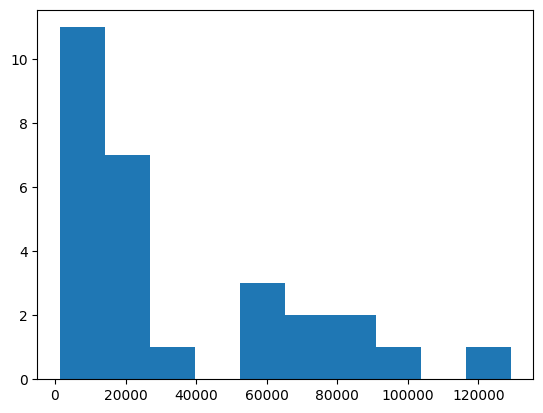

In [39]:
import matplotlib.pyplot as plt
print(dataset.path_lengths)
plt.hist(dataset.path_lengths)

In [40]:
env


In [41]:
env._target

(16, 21)

In [42]:
observations = env.reset()
observations, env._target

(array([ 1.60156079e+01,  6.99052517e+00, -2.15160993e-03, -5.77475758e-02]),
 (16, 21))

In [43]:
sg = np.concatenate([observations[None], np.array([[*env._target, 0, 0]])], axis=0)
sg.shape

(2, 4)

Saved 1 samples to: /root/diffuser_chain_hd/scripts/sg.png


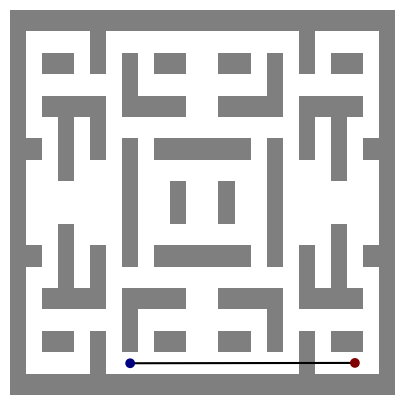

In [44]:
renderer.composite('/root/diffuser_chain_hd/scripts/sg.png', sg[None], ncol=1)

(780, 4)
(780, 4)
(780, 4)
(780, 4)
(780, 4)
(780, 4)
(780, 4)
(780, 4)
(780, 4)
(780, 4)
(10, 780, 4)
Saved 10 samples to: /root/diffuser_chain_hd/scripts/trjs.png


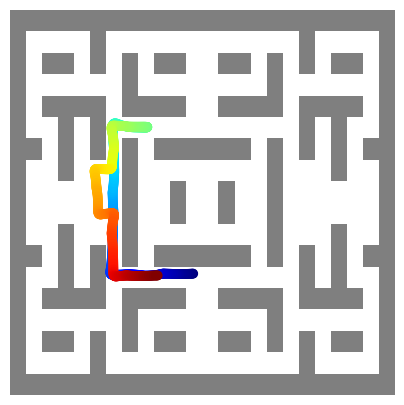

In [45]:
trjs = []
for i in range(10):
    idx = np.random.randint(0, len(dataset))
    trj = dataset.normalizer.unnormalize(dataset[idx].trajectories, "observations")
    trjs.append(trj)
    print(trj.shape)

    
print(np.array(trjs).shape)
renderer.composite('/root/diffuser_chain_hd/scripts/trjs.png', np.array(trjs), ncol=1)

In [46]:
len(dataset)

965525

In [47]:
trjs = []
for i in range(len(dataset)):
    idx = i
    trj = dataset.normalizer.unnormalize(dataset[idx].trajectories, "observations")[:, :2]
    # print(np.linalg.norm(trj - np.array(env._target)))
    # print(np.linalg.norm(trj - np.array(env._target), axis=1).min())
    if (np.linalg.norm(trj - np.array(env._target), axis=1) < 1).any():
        trjs.append(trj)
    # if i > 1000:
    #     break

print(np.array(trjs).shape)
# trjs = trjs[:100]
# renderer.composite('/root/diffuser_chain_hd/scripts/trjs_jup.png', np.array(trjs), ncol=10)

(4769, 780, 2)


Saved 100 samples to: /root/diffuser_chain_hd/scripts/trjs_jup_1.png


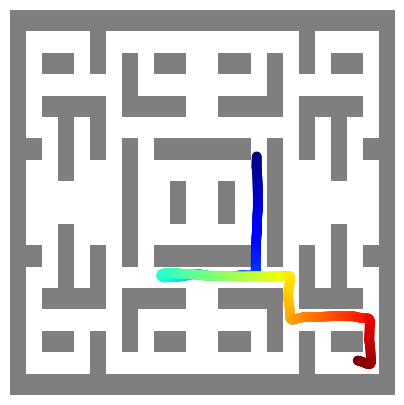

In [48]:
_trjs = np.array(trjs)[np.random.randint(0, len(trjs), 100)]
renderer.composite('/root/diffuser_chain_hd/scripts/trjs_jup_1.png', np.array(_trjs), ncol=10)

Saved 100 samples to: /root/diffuser_chain_hd/scripts/trjs_jup.png


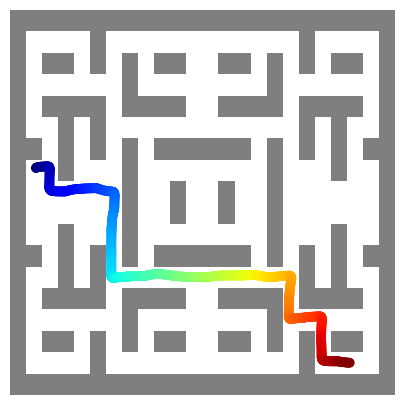